In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read data
df = pd.read_csv("//content//customer_booking.csv", encoding='ISO-8859-1')

In [3]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
print(f'Shape of the dataset : {df.shape}')

Shape of the dataset : (50000, 14)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

###Data Cleaning

In [6]:
#checking for null values
df.isnull().sum()

,0
num_passengers,0
sales_channel,0
trip_type,0
purchase_lead,0
length_of_stay,0
flight_hour,0
flight_day,0
route,0
booking_origin,0
wants_extra_baggage,0


In [7]:
df = df.dropna()

In [8]:
df.isnull().sum().sum()

0

In [9]:
#checking for any duplicate values
df.duplicated().all()

False

###EDA

<Axes: xlabel='sales_channel', ylabel='count'>

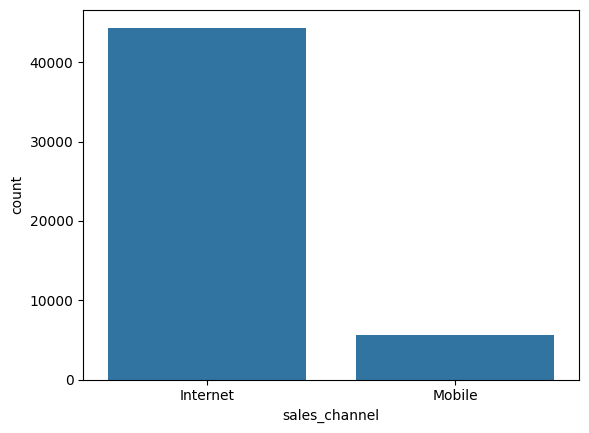

In [10]:
sns.countplot(x=df.sales_channel	, data=df)

<Axes: xlabel='booking_complete', ylabel='count'>

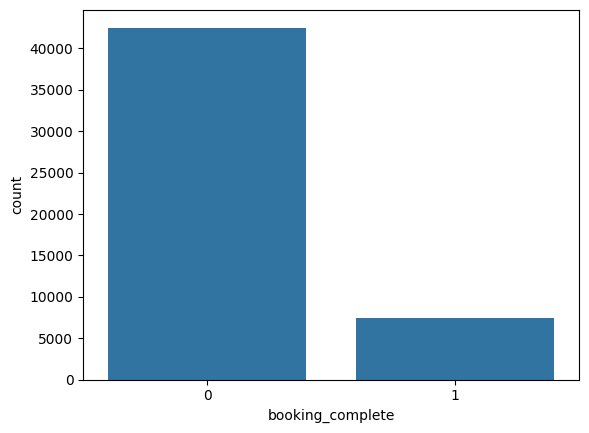

In [11]:
sns.countplot(x=df.booking_complete, data=df)

In [12]:
df['flight_day'].value_counts().sort_values(ascending =False)

,count
flight_day,
Mon,8102
Wed,7674
Tue,7673
Thu,7424
Fri,6761
Sun,6554
Sat,5812


<Axes: xlabel='flight_day', ylabel='count'>

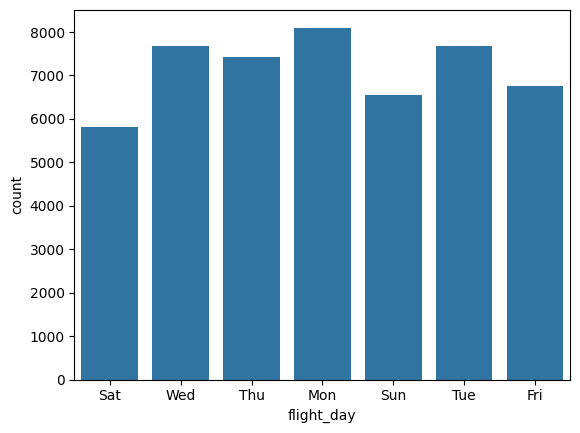

In [13]:
#countplot
sns.countplot(x='flight_day',data=df)

In [14]:
#converting categorical feature into numerical feature
df.sales_channel = df.sales_channel.map({'Internet':0,'Mobile':1})
df.trip_type = df.trip_type.map({'RoundTrip':0, 'CircleTrip':1, 'OneWay':2})
day_mapping = {
    'Mon': 1,
    'Tue': 2,
    'Wed': 3,
    'Thu': 4,
    'Fri': 5,
    'Sat': 6,
    'Sun': 7
}
df.flight_day = df.flight_day.map(day_mapping)

<Axes: >

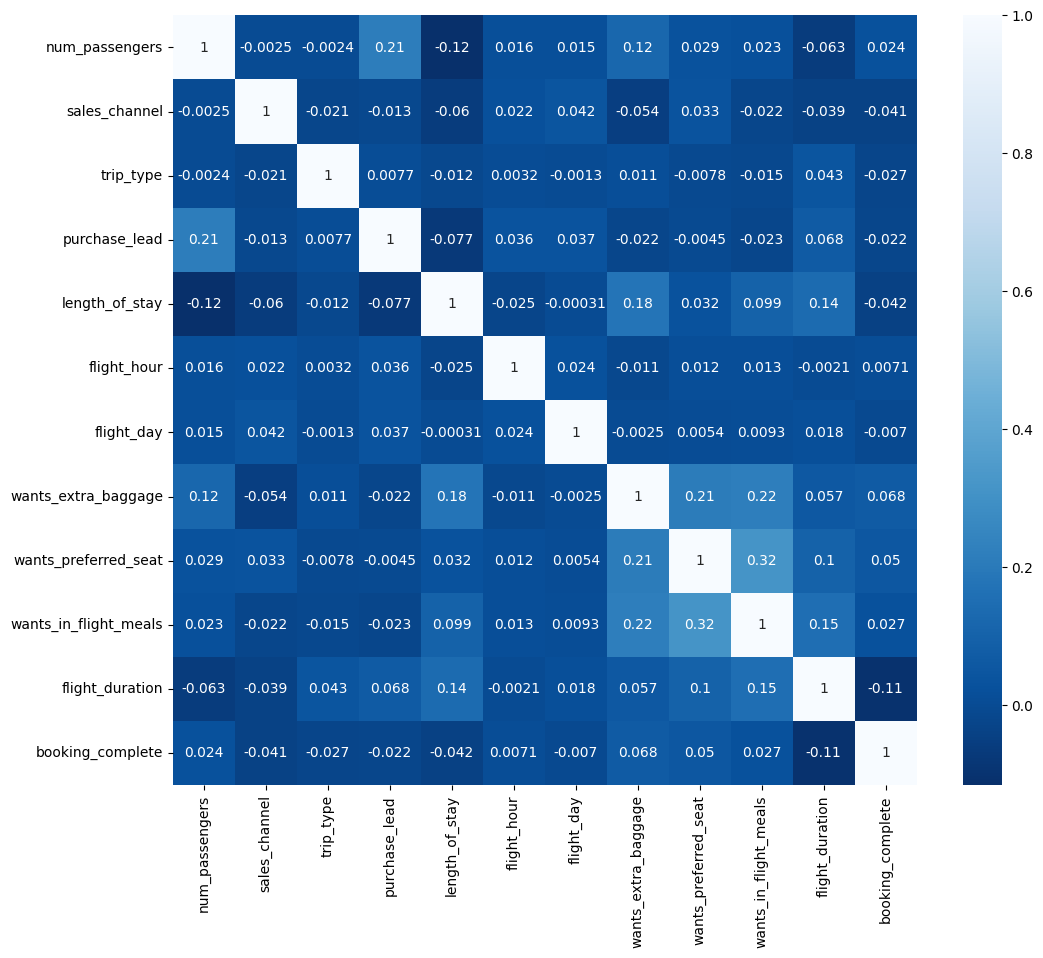

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(df.drop(['route','booking_origin'],axis=1).corr(),annot=True,cmap='Blues_r')

In [16]:
corr=df.drop(['route','booking_origin'],axis=1).corr()
high_corr_features=corr.index[abs(corr['booking_complete'])>0.01]
print(f'highly correlated feature:\n',high_corr_features)
print(f'No. of highly correlated features:',len(high_corr_features))

highly correlated feature:
 Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')
No. of highly correlated features: 10


In [17]:
df = df.drop(['route','booking_origin'],axis=1)

In [18]:
df['booking_complete'].value_counts()

,count
booking_complete,
0,42522
1,7478


###Model Building

In [19]:
x = df.drop('booking_complete', axis =1)
y = df['booking_complete']

In [20]:
#splitting data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [21]:
print(f'x_train',x_train.shape)
print(f'y_train',y_train.shape)
print(f'x_test',x_test.shape)
print(f'y_test',y_test.shape)


x_train (40000, 11)
y_train (40000,)
x_test (10000, 11)
y_test (10000,)


In [22]:
#to balance the dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_smote,y_train_smote = smote.fit_resample(x_train,y_train)

In [23]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators =100, max_depth =23, random_state =0)
clf.fit(x_train_smote,y_train_smote)

RandomForestClassifier(max_depth=23, random_state=0)

###Prediction and Accuracy

In [24]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

pred = clf.predict(x_test)
c = classification_report(y_test,pred)
print(c)
a = accuracy_score(y_test,pred)
print('Accuracy : ', round(a ,4)*100,'%')




              precision    recall  f1-score   support

           0       0.87      0.87      0.87      8520
           1       0.25      0.26      0.25      1480

    accuracy                           0.78     10000
   macro avg       0.56      0.56      0.56     10000
weighted avg       0.78      0.78      0.78     10000

Accuracy :  77.75999999999999 %


In [25]:
#confusion Matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,pred)
cm

array([[7397, 1123],
       [1101,  379]])

Text(0.5, 0, 'Random Forest Feature Importance')

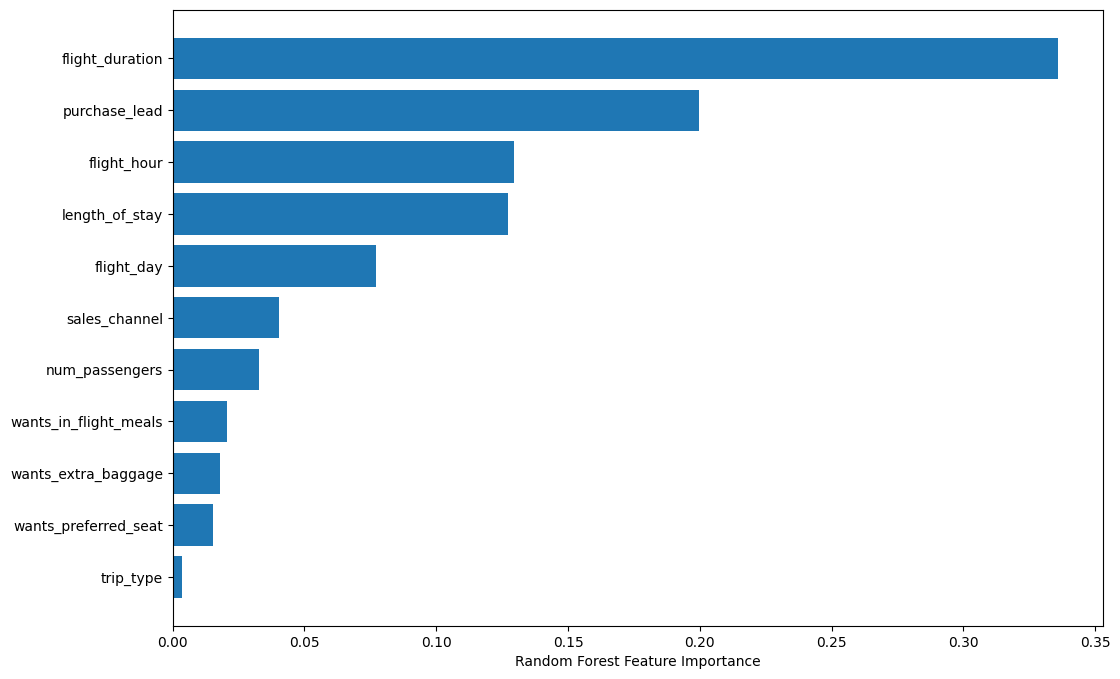

In [26]:
plt.figure(figsize=(12,8))
sorted = clf.feature_importances_.argsort()
plt.barh(df.iloc[:,:-1].columns[sorted],clf.feature_importances_[sorted])
plt.xlabel("Random Forest Feature Importance")